# PROYECTO: APROBACIÓN DE PRESTAMOS A PEQUEÑAS EMPRESAS EN LOS ESTADOS UNIDOS

# METODOLOGÍA CRISP-DM

En la implementación de un proyecto de Ciencia de Datos exiten diferentes metodologías que nos permiten dividir nuestro trabajo en etapas, organizar de mejor manera el trabajo y obtener resultados confiables. Dichas metodologías son sumamente útiles ya que nos permitirán tener un flujo de trabajo claro y los resultados serán replicables en cualquier otra empresa. Entre las metodologías más populares se encuentra la metodología SEMMA creada por el SAS Institutey también la metodología CRISP-DM. 
Para este proyecto usaremos la metodología CRISP-DM la cual consta de las siguiente etapas: \\
* **Entendimiento del negocio**
* **Entendimiento de los datos**
* **Preparación de los datos**
* **Construcción del modelo**
* **Evaluación**
* **Despliegue en producción**



## ENTENDIMIENTO DEL NEGOCIO

La Agencia Federal de Pequeños Negocios de los Estados Unidos (SBA por sus siglas en inglés) es una agencia gubernamental encargada de brindar ayuda a las pequeñas empresas que desean iniciar, construir o expandir sus negocios y actividades. Entre los servicios que ofrece la SBA se encuentran programas de asesorías, capital, contratación gubernamental, entre otros. Su fundación se remonta a 1953 y desde entonces ha ayudado a pequeñas empresas que progresivamente incrementaron sus negocios, uno de los ejemplos más reconocidos es Fedex y Appel. En la actualidad la SBA cuenta con oficinas en cada uno de los 51 estados de los EU, y sigue promoviendo beneficios sociales tales como la creación de empleos que ofrecen las pequeñas empresas que inician sus operaciones.
    Entre los programas que tiene la SBA existe uno llamado “Garantía de préstamo”, dicho programa busca convencer a los bancos de aprobar préstamos a pequeñas empresas, donde la SBA se compromete a cubrir una parte de la deuda de le empresa en caso de incumplimiento. Es en cierto sentido como un seguro, donde la SBA absorberá parte de la responsabilidad en caso insolvencia de las pequeñas empresas. Sin embargo, aun cuando la SBA garantiza un monto, los bancos siguen expuestos a la probabilidad de incumplimiento y a pérdidas económicas. Para los bancos en EU es importante analizar con métodos confiables la información de las empresas a fin de tomar la decisión de otorgarles el préstamo o no. 
    En este proyecto nos daremos a la tarea de analizar la información de una base de datos con información de préstamos a pequeñas empresas e implementar el mejor modelo para predecir el incumplimiento de pago.

## ENTENDIMIENTO DE LOS DATOS

El siguiente paso es la compresión de nuestros datos, esto lo podemos lograr explorando la base de datos con la que contamos, y en caso de ser posible, consultando con los dueños de la información cualquier duda que podamos tener al respecto.
También en esta etapa es donde realizamos el Análisis Exploratorio de Datos el cual nos permitirá conocer un poco más a detalles cada una de las variables disponibles en el data set, así como identificar caracteristicas de cada variables, correlaciones, etc. Esto se logra a través de técnicas de estadística descriptiva.

In [139]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statistics as sts
from scipy import stats
import re
import pandas as pd
import numpy as np
from numpy import zeros
from numpy import asarray
from numpy import array
import itertools
import collections
import csv
# Tunning plots
import matplotlib.lines as mlines
from matplotlib.ticker import MaxNLocator
%matplotlib inline
pd.set_option('display.max_columns', 100)
SEED = 15432
# scikit-learn
from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge,RidgeCV
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import validation_curve
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split


#La opción para definir el número de columnas que deseo que pandas imprima
pd.set_option('display.max_columns', 500)  

In [140]:
# Lectura de los datos 
data = pd.read_csv("SBAnational.csv") 

# Dimension de los datos
print("Dimension de los datos",data.shape)

# Variables disponibles
lista_variables = []
lista_tipo = []

for k in data.columns:
  lista_variables.append(k)
  lista_tipo.append(type(data[k][0]))

variables = pd.DataFrame({"Nombre Variable":lista_variables,"Tipo de Dato":lista_tipo})
print(variables)

Dimension de los datos (899164, 27)
      Nombre Variable             Tipo de Dato
0       LoanNr_ChkDgt    <class 'numpy.int64'>
1                Name            <class 'str'>
2                City            <class 'str'>
3               State            <class 'str'>
4                 Zip    <class 'numpy.int64'>
5                Bank            <class 'str'>
6           BankState            <class 'str'>
7               NAICS    <class 'numpy.int64'>
8        ApprovalDate            <class 'str'>
9          ApprovalFY    <class 'numpy.int64'>
10               Term    <class 'numpy.int64'>
11              NoEmp    <class 'numpy.int64'>
12           NewExist  <class 'numpy.float64'>
13          CreateJob    <class 'numpy.int64'>
14        RetainedJob    <class 'numpy.int64'>
15      FranchiseCode    <class 'numpy.int64'>
16         UrbanRural    <class 'numpy.int64'>
17          RevLineCr            <class 'str'>
18             LowDoc            <class 'str'>
19         ChgOffDate   

Para poder explorar las variables de mejor manera, procederemos a separarlas entre variables cuantitativas y variables categoricas.

### Variables Cuantitativas

In [141]:
# Descripción: Variable LoanNr_ChkDgt representa una PK de la tabla
# Acciones: Eliminar variable
data["LoanNr_ChkDgt"]    
data.drop(columns=["LoanNr_ChkDgt"],inplace=True)

In [142]:
# Descripción: Año de aprobación del préstamo por parte de la SBA
# Acción: Usarla para construir el modelo
data["ApprovalFY"]

0         1997
1         1997
2         1997
3         1997
4         1997
          ... 
899159    1997
899160    1997
899161    1997
899162    1997
899163    1997
Name: ApprovalFY, Length: 899164, dtype: int64

In [143]:
# Descripción: Plazo del préstamo en meses
# Acción: Ninguna, la usaremos para el modelo
data["Term"]

0          84
1          60
2         180
3          60
4         240
         ... 
899159     60
899160     60
899161    108
899162     60
899163     48
Name: Term, Length: 899164, dtype: int64

In [144]:
# Descripción: Número de empleados  en la empresa
# Acciones: Ninguna
data["NoEmp"]

0          4
1          2
2          7
3          2
4         14
          ..
899159     6
899160     6
899161    26
899162     6
899163     1
Name: NoEmp, Length: 899164, dtype: int64

In [145]:
# Descripción: Número de empleos creados por la empresa
# Acciones: Ninguna. No tiene NA
data["CreateJob"]

0         0
1         0
2         0
3         0
4         7
         ..
899159    0
899160    0
899161    0
899162    0
899163    0
Name: CreateJob, Length: 899164, dtype: int64

In [146]:
# Descripcion:Número de empleos retenidos por la empresa
# Acciones: Ninguna, no tiene valores NA

data["RetainedJob"]

0         0
1         0
2         0
3         0
4         7
         ..
899159    0
899160    0
899161    0
899162    0
899163    0
Name: RetainedJob, Length: 899164, dtype: int64

In [147]:
# BalanceGross	Numérica	Monto pendiente
# Acciones: Esta variable tiene muy poca varianza, el 99.9% de los valores son 0. Eliminar esta variable

print(data["BalanceGross"].value_counts())
data.drop(columns=["BalanceGross"],inplace=True)

0         899150
12750          1
827875         1
25000          1
37100          1
43127          1
84617          1
1760           1
115820         1
996262         1
395476         1
41509          1
600            1
9111           1
96908          1
Name: BalanceGross, dtype: int64


In [148]:
# Descripción:	Monto castigado
# Acciones: Ninguna. No tiene NAN. Eliminar ya que nos indica si el credito falló o no

data["ChgOffPrinGr"].isna().sum()
data.drop(columns=["ChgOffPrinGr"],inplace=True)

In [149]:
# Descripción: Monto de préstamo aprobado por el banco
# Acciones: No tiene NA, no realziamos ninguna acción.

data["GrAppv"].describe()

count    8.991640e+05
mean     1.926870e+05
std      2.832634e+05
min      2.000000e+02
25%      3.500000e+04
50%      9.000000e+04
75%      2.250000e+05
max      5.472000e+06
Name: GrAppv, dtype: float64

In [150]:
# Descripción: Monto de préstamo garantizado por la SBA
# Acciones: No tiene NAN. No realizamos ningún ajuste

data["SBA_Appv"].isna().sum()

0

In [151]:
# Descripcion: DisbursementDate	Fecha	Fecha de desembolso
# Accion: Extraer solo el año. Imputar los 2368 NA con "ApprovalFY" (Año de aprobación de credito}
data["DisbursementDate"] = data["DisbursementDate"].str.split('-', expand=True).iloc[::,2].copy()
data.loc[(data["DisbursementDate"].isna()) ,"DisbursementDate"] = data.loc[(data["DisbursementDate"].isna()),"ApprovalFY"].apply(str).str[:2]
sorted(data["DisbursementDate"].unique())

data.drop(columns=["DisbursementDate"],inplace=True)

### Variables Categóricas

In [152]:
# Descripción: Variable Name representa el nombre de la empresa que solicitó el prestamo
# Acciones: Eliminar variable ya que resulta irrelevante el nombre
print(data["Name"])

data.drop(columns=["Name"],inplace=True)

0                         ABC HOBBYCRAFT
1            LANDMARK BAR & GRILLE (THE)
2                  WHITLOCK DDS, TODD M.
3          BIG BUCKS PAWN & JEWELRY, LLC
4            ANASTASIA CONFECTIONS, INC.
                       ...              
899159                      FABRIC FARMS
899160                      FABRIC FARMS
899161      RADCO MANUFACTURING CO.,INC.
899162             MARUTAMA HAWAII, INC.
899163    PACIFIC TRADEWINDS FAN & LIGHT
Name: Name, Length: 899164, dtype: object


In [153]:
# Descripción: Variable City representa la ciudad de donde proviene la empresa que solicitó el prestamo
# Acciones: Tenemos en total 32,582 categorías en esta variable, tiene demasiadas categorías y al implementar un modelo puede ser muy costoso.
#           De acuerdo con Mineria de Datos con R, de Amparo Gaona, podemos agruparla en categorías más generales, por ejemplo, 
print(data["City"])
data.drop(columns=["City"],inplace=True)

0              EVANSVILLE
1               NEW PARIS
2             BLOOMINGTON
3            BROKEN ARROW
4                 ORLANDO
               ...       
899159    UPPER ARLINGTON
899160           COLUMBUS
899161        SANTA MARIA
899162           HONOLULU
899163             KAILUA
Name: City, Length: 899164, dtype: object


In [154]:
# Descripción: Estado de donde proviene la empresa
# Acciones: Imputar los valores NA
data["State"].isna().sum()

data.dropna(subset=["State"],inplace=True)

In [155]:
# Descripción: Código de ubicación de la empresa.
# Acciones: Se cueenta con 33,611 categorias diferentes. PRocederemos a agrupar en clases mas generales, en este caso usaremos el State.
#           Por lo cual se eliminará la variable Zip
print(len(data["Zip"].unique()))
data.drop(columns=["Zip"],inplace=True)

33610


In [156]:
# Decripción: Nombre del banco que otorgo el préstamo
# Acciones: Existen 5,803 categorías en esta columna. Podriamos conservar solo las categorias mas repetidas. Pero para fines practicos eliminare la variable.
print(data["Bank"].value_counts(1))
data.drop(columns=["Bank"],inplace=True)

BANK OF AMERICA NATL ASSOC        0.096762
WELLS FARGO BANK NATL ASSOC       0.070747
JPMORGAN CHASE BANK NATL ASSOC    0.053662
U.S. BANK NATIONAL ASSOCIATION    0.039153
CITIZENS BANK NATL ASSOC          0.039053
                                    ...   
5 STAR BANK                       0.000001
LIVERPOOL COMMUNITY BANK          0.000001
BUCKEYE STATE CU INC              0.000001
WATERFORD BANK NATL ASSOC         0.000001
DEPCO                             0.000001
Name: Bank, Length: 5801, dtype: float64


In [157]:
# Descripción: Estado del banco que otorgo el préstamo 
# Acciones: Imputar los NA
data["BankState"].isna().sum()

data.dropna(subset=["BankState"],inplace=True)

In [158]:
# Descripcion: Código de clasificación de negocios de EU por tipo de actividad
# Acciones: Conservar los primeros 2 digitos para conocer las 25 actividades distintas. Imputar NA = 0 ya que tiene 22%

data["NAICS"] = data["NAICS"].apply(str).str[:2]
data["NAICS"]
data["NAICS"].value_counts()

0     201002
44     84656
81     72567
54     68123
72     67597
23     66559
62     55312
42     48678
45     42457
33     38213
56     32670
48     20305
32     17910
71     14632
53     13618
31     11792
51     11374
52      9496
11      8986
61      6425
49      2221
21      1844
22       662
55       257
92       229
Name: NAICS, dtype: int64

In [159]:
# Descripción: Fecha de aprobación del préstamo por parte de la SBA
# Acción: Tiene demasiadas categorias, eliminar esta variable
data["ApprovalDate"] 
data.drop(columns=["ApprovalDate"],inplace=True)

In [160]:
# Descripción:  Indicador si la empresa tiene 2 años de existencia o no.
#               1: Negocio Existente. 2: Negocio nuevo.
# Acciones: Se tenian 136 valores con NA. Los elimninaremos al ser una porción muy pequeña.

data.dropna(subset=["NewExist"],inplace=True)
data["NewExist"] = data["NewExist"].apply(int).apply(str)
data["NewExist"] 

0         2
1         2
2         1
3         1
4         1
         ..
899159    1
899160    1
899161    1
899162    1
899163    2
Name: NewExist, Length: 897449, dtype: object

In [161]:
# Descripcion:  Indentificador de si la empresa tiene franquicias o no.
#               00000 ó 00001 significa no franquicia.
# Acciones: Agregar las categorias en Franquicia / No Franquicia

filas = (data["FranchiseCode"]==0) | (data["FranchiseCode"]==1)
data.loc[filas,"FranchiseCode"] = "No_Franquicia"
data.loc[~filas,"FranchiseCode"] = "Franquicia"
data["FranchiseCode"].value_counts()

No_Franquicia    845758
Franquicia        51691
Name: FranchiseCode, dtype: int64

In [162]:
# Descripción:  Indicador si el negocio es rural o no.
#               1=Urbano, 2=Rural, 0=Indefinido.
# Acciones:     No tiene NA. Categorizar en Urbano/Rural/Indefinido
data.loc[data["UrbanRural"]==1,"UrbanRural"] = "Urbano"
data.loc[data["UrbanRural"]==2,"UrbanRural"] = "Rural"
data.loc[data["UrbanRural"]==0,"UrbanRural"] = "Indefinido"
data["UrbanRural"].value_counts()

Urbano        470541
Indefinido    321600
Rural         105308
Name: UrbanRural, dtype: int64

In [163]:
# Descripcion: Si el crédito es revolvente o no. Yes o No.
# Acciones: Tiene un 28% de valores que no caen en las 2 categorias. Eliminar columna
data["RevLineCr"].value_counts()
data.drop(columns=["RevLineCr"],inplace=True)

In [164]:
# Descripción: Préstamo procesado usando la aplicación one-page (Más rápido que el estándar). Yes o No. 
# Acciones: Asignar las categorias en Y o N, los NA mandarlos a la moda
data["LowDoc"].value_counts()

moda = data["LowDoc"].mode()
data.loc[(data["LowDoc"]!="N") & (data["LowDoc"]!="Y"),"LowDoc"] = moda
data["LowDoc"].value_counts()

N    781224
Y    110224
Name: LowDoc, dtype: int64

In [165]:
# Descripción:	Fecha cuando el préstamo se declaró en default
# Acciones: Esta variable tiene un 81% de valores NAN, hay que eliminarla.

100*data["ChgOffDate"].isna().sum()/len(data)
data.drop(columns=["ChgOffDate"],inplace=True)

In [166]:
# Descripción: Monto desembolsado
# Acciones: Ninguna, esta variable no tiene NA
data["DisbursementGross"].describe()

count    8.974490e+05
mean     2.011936e+05
std      2.876997e+05
min      0.000000e+00
25%      4.200000e+04
50%      1.000000e+05
75%      2.380000e+05
max      1.144632e+07
Name: DisbursementGross, dtype: float64

In [167]:
# Descripcion: Estatus del préstamo. PIF es pagado totalmente. CHGOFF es que hubo incumplimiento en el préstamo.
# Acciones: Dado que esta es la variable objetivo, eliminaremos los valores NA.

data.dropna(subset=["MIS_Status"],inplace=True)
data["MIS_Status"].isna().sum()

data.loc[data["MIS_Status"]=="P I F","MIS_Status"] = "No_Default"
data.loc[data["MIS_Status"]=="CHGOFF","MIS_Status"] = "Default"

100*data["MIS_Status"].value_counts(1)


No_Default    82.415548
Default       17.584452
Name: MIS_Status, dtype: float64

## PREPARACIÓN DE LOS DATOS

### Variables Cuantitativas

In [168]:
#Definir las variables cuantitativas
cuantitativas = ["ApprovalFY","Term","NoEmp","CreateJob","RetainedJob","DisbursementGross","GrAppv","SBA_Appv"]

In [169]:
#Conteo de valores NA
data[cuantitativas].isna().sum()

ApprovalFY           0
Term                 0
NoEmp                0
CreateJob            0
RetainedJob          0
DisbursementGross    0
GrAppv               0
SBA_Appv             0
dtype: int64

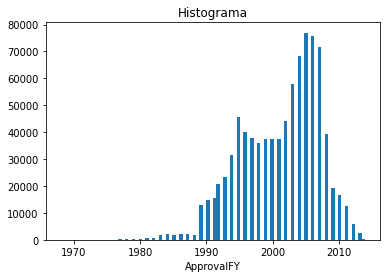

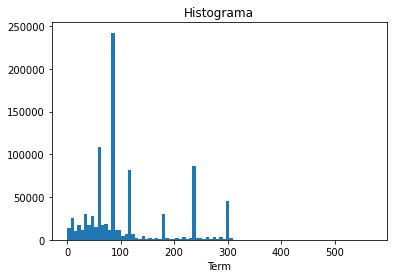

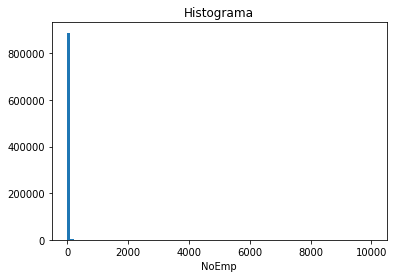

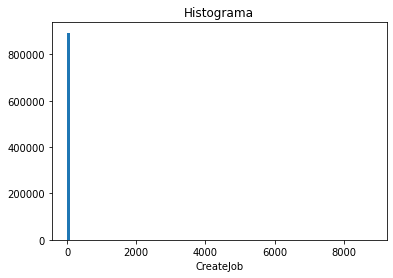

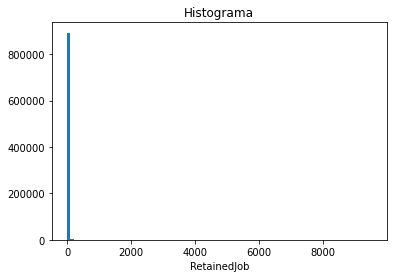

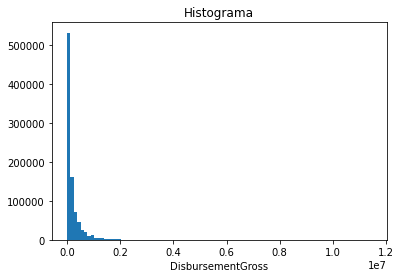

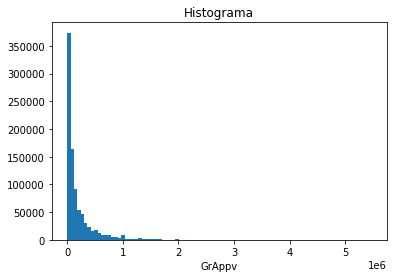

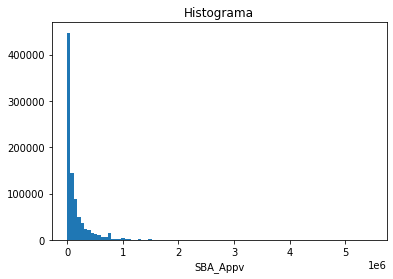

In [170]:
# Histogramas
def mi_histograma(df,column,bins,title):
  import matplotlib.pyplot as plt
  fig, ax = plt.subplots()
  ax.hist(df[column],bins=bins)
  ax.set_xlabel(column)
  ax.set_title(title)
  plt.show()

for j in cuantitativas:
  mi_histograma(data,j,90,"Histograma")

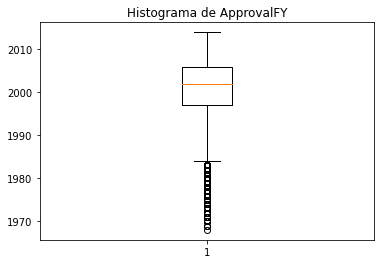

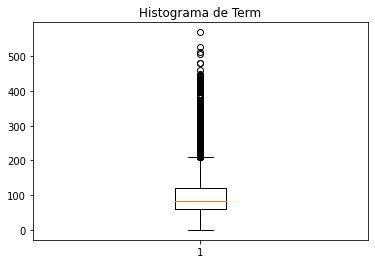

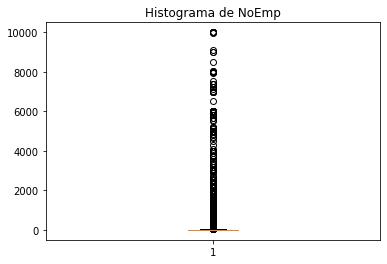

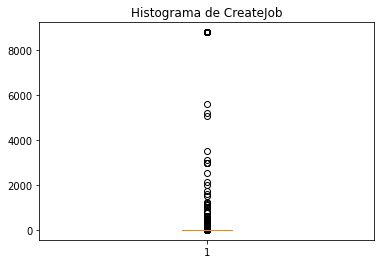

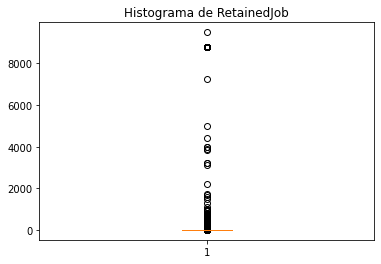

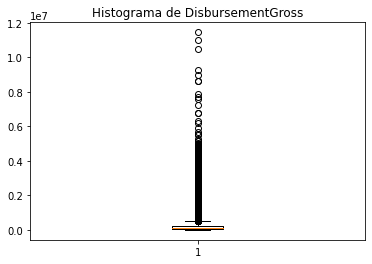

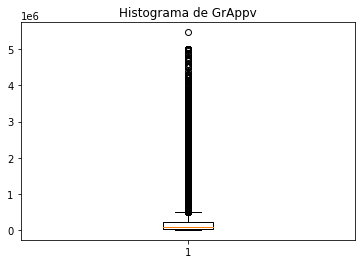

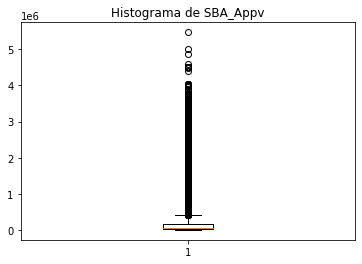

In [171]:
# Histogramas
def mi_boxplot(df,column,title):
  import matplotlib.pyplot as plt
  fig, ax = plt.subplots()
  ax.boxplot(df[column])
  ax.set_title(title)
  plt.show()

for j in cuantitativas:
  mi_boxplot(data,j,"Histograma de "+j)

In [172]:
# Escalamiento de variables cuantitativas

data_cuantitativas = data[cuantitativas].copy()

# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()
# scaler.fit(data_cuantitativas)
# data_cuantitativas = pd.DataFrame(scaler.transform(data_cuantitativas),columns=cuantitativas)
data_cuantitativas 


,ApprovalFY,Term,NoEmp,CreateJob,RetainedJob,DisbursementGross,GrAppv,SBA_Appv
0,1997,84,4,0,0,60000,60000,48000
1,1997,60,2,0,0,40000,40000,32000
2,1997,180,7,0,0,287000,287000,215250
3,1997,60,2,0,0,35000,35000,28000
4,1997,240,14,7,7,229000,229000,229000
...,...,...,...,...,...,...,...,...
899159,1997,60,6,0,0,70000,70000,56000
899160,1997,60,6,0,0,85000,85000,42500
899161,1997,108,26,0,0,300000,300000,225000
899162,1997,60,6,0,0,75000,75000,60000


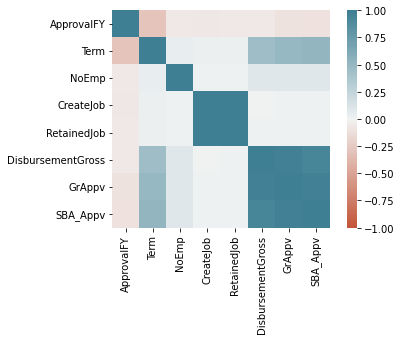

In [173]:
#Matriz de correlación
import seaborn as sns
import matplotlib.pyplot as plt
ax = sns.heatmap(data_cuantitativas.corr(),vmin=-1, vmax=1, center=0,cmap=sns.diverging_palette(20, 220, n=200),square=True)

### Variables Categoricas

In [174]:
categoricas = ["State","BankState","NAICS","FranchiseCode","UrbanRural","LowDoc","NewExist"]
data[categoricas]

,State,BankState,NAICS,FranchiseCode,UrbanRural,LowDoc,NewExist
0,IN,OH,45,No_Franquicia,Indefinido,Y,2
1,IN,IN,72,No_Franquicia,Indefinido,Y,2
2,IN,IN,62,No_Franquicia,Indefinido,N,1
3,OK,OK,0,No_Franquicia,Indefinido,Y,1
4,FL,FL,0,No_Franquicia,Indefinido,N,1
...,...,...,...,...,...,...,...
899159,OH,IL,45,No_Franquicia,Indefinido,N,1
899160,OH,IL,45,No_Franquicia,Indefinido,N,1
899161,CA,CA,33,No_Franquicia,Indefinido,N,1
899162,HI,HI,0,No_Franquicia,Indefinido,Y,1


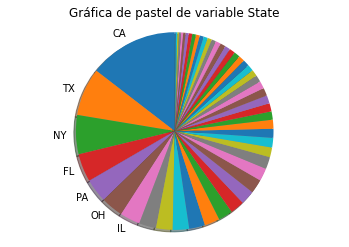

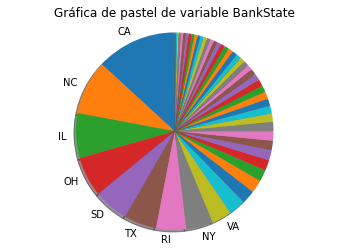

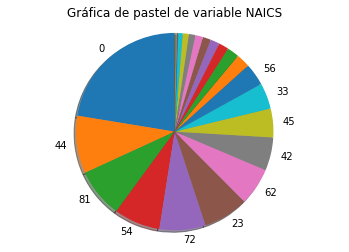

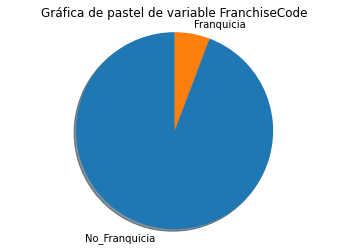

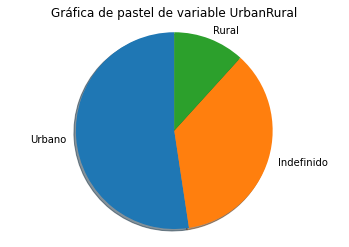

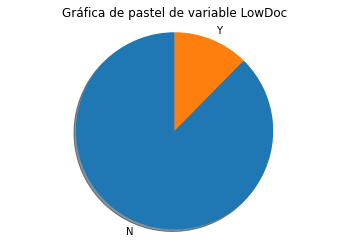

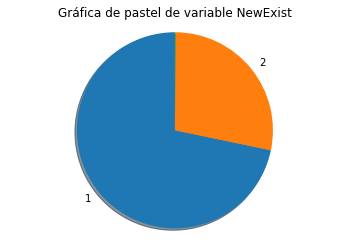

In [175]:
#GRAFICA DE PASTEL 

def mi_pastel(df,columna,porcentaje):
  x = 100*data[columna].value_counts(1)
  x = pd.DataFrame(x).reset_index()
  x.columns = [columna,"Porcentaje"]

  for k in range(0,x.shape[0]):
    if (x.loc[k,"Porcentaje"] < porcentaje):
      x.loc[k,columna] = ""
  labels = x[columna]
  sizes = x["Porcentaje"]

  import matplotlib.pyplot as plt
  fig, ax = plt.subplots()
  ax.pie(sizes, labels=labels,shadow=True, startangle=90)
  ax.axis('equal')
  ax.set_title("Gráfica de pastel de variable " + columna)
  plt.show()

for j in categoricas:
  mi_pastel(data,j,3.0)

In [176]:
# Numero de categorias distintas para cada variables categorica
for j in categoricas:
  print(j,len(data[j].unique()))

State 51
BankState 56
NAICS 25
FranchiseCode 2
UrbanRural 3
LowDoc 3
NewExist 3


In [177]:
# one-hot encoding para las variables categoricas
data_dummies = data[categoricas].copy()

for k in categoricas:
  temporal = pd.get_dummies(data[k],drop_first=False,prefix= k + "_")
  data_dummies = pd.merge(data_dummies,temporal,left_index=True,right_index=True)
  data_dummies.drop(columns=[k],inplace=True)

# data_dummies = data_dummies.reset_index()
data_dummies

,State__AK,State__AL,State__AR,State__AZ,State__CA,State__CO,State__CT,State__DC,State__DE,State__FL,State__GA,State__HI,State__IA,State__ID,State__IL,State__IN,State__KS,State__KY,State__LA,State__MA,State__MD,State__ME,State__MI,State__MN,State__MO,State__MS,State__MT,State__NC,State__ND,State__NE,State__NH,State__NJ,State__NM,State__NV,State__NY,State__OH,State__OK,State__OR,State__PA,State__RI,State__SC,State__SD,State__TN,State__TX,State__UT,State__VA,State__VT,State__WA,State__WI,State__WV,State__WY,BankState__AK,BankState__AL,BankState__AN,BankState__AR,BankState__AZ,BankState__CA,BankState__CO,BankState__CT,BankState__DC,BankState__DE,BankState__EN,BankState__FL,BankState__GA,BankState__GU,BankState__HI,BankState__IA,BankState__ID,BankState__IL,BankState__IN,BankState__KS,BankState__KY,BankState__LA,BankState__MA,BankState__MD,BankState__ME,BankState__MI,BankState__MN,BankState__MO,BankState__MS,BankState__MT,BankState__NC,BankState__ND,BankState__NE,BankState__NH,BankState__NJ,BankState__NM,BankState__NV,BankState__NY,BankState__OH,BankState__OK,BankState__OR,BankState__PA,BankState__PR,BankState__RI,BankState__SC,BankState__SD,BankState__TN,BankState__TX,BankState__UT,BankState__VA,BankState__VI,BankState__VT,BankState__WA,BankState__WI,BankState__WV,BankState__WY,NAICS__0,NAICS__11,NAICS__21,NAICS__22,NAICS__23,NAICS__31,NAICS__32,NAICS__33,NAICS__42,NAICS__44,NAICS__45,NAICS__48,NAICS__49,NAICS__51,NAICS__52,NAICS__53,NAICS__54,NAICS__55,NAICS__56,NAICS__61,NAICS__62,NAICS__71,NAICS__72,NAICS__81,NAICS__92,FranchiseCode__Franquicia,FranchiseCode__No_Franquicia,UrbanRural__Indefinido,UrbanRural__Rural,UrbanRural__Urbano,LowDoc__N,LowDoc__Y,NewExist__0,NewExist__1,NewExist__2
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,1
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,1
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,1,0,0,1,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,1,0
4,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
899159,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,

### Separación en Train y Test

In [189]:
# Sepación de datos en conjunto de variables independientes (X) y en variable objetivo (y)

y = np.array(data["MIS_Status"])
y[y=="No_Default"]="0"
y[y=="Default"]="1"
X = pd.merge(data_cuantitativas,data_dummies,left_index=True,right_index=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1,stratify=y)

unique, counts = np.unique(y_train, return_counts=True)
dict(zip(unique, counts))

X_train

,ApprovalFY,Term,NoEmp,CreateJob,RetainedJob,DisbursementGross,GrAppv,SBA_Appv,State__AK,State__AL,State__AR,State__AZ,State__CA,State__CO,State__CT,State__DC,State__DE,State__FL,State__GA,State__HI,State__IA,State__ID,State__IL,State__IN,State__KS,State__KY,State__LA,State__MA,State__MD,State__ME,State__MI,State__MN,State__MO,State__MS,State__MT,State__NC,State__ND,State__NE,State__NH,State__NJ,State__NM,State__NV,State__NY,State__OH,State__OK,State__OR,State__PA,State__RI,State__SC,State__SD,State__TN,State__TX,State__UT,State__VA,State__VT,State__WA,State__WI,State__WV,State__WY,BankState__AK,BankState__AL,BankState__AN,BankState__AR,BankState__AZ,BankState__CA,BankState__CO,BankState__CT,BankState__DC,BankState__DE,BankState__EN,BankState__FL,BankState__GA,BankState__GU,BankState__HI,BankState__IA,BankState__ID,BankState__IL,BankState__IN,BankState__KS,BankState__KY,BankState__LA,BankState__MA,BankState__MD,BankState__ME,BankState__MI,BankState__MN,BankState__MO,BankState__MS,BankState__MT,BankState__NC,BankState__ND,BankState__NE,BankState__NH,BankState__NJ,BankState__NM,BankState__NV,BankState__NY,BankState__OH,BankState__OK,BankState__OR,BankState__PA,BankState__PR,BankState__RI,BankState__SC,BankState__SD,BankState__TN,BankState__TX,BankState__UT,BankState__VA,BankState__VI,BankState__VT,BankState__WA,BankState__WI,BankState__WV,BankState__WY,NAICS__0,NAICS__11,NAICS__21,NAICS__22,NAICS__23,NAICS__31,NAICS__32,NAICS__33,NAICS__42,NAICS__44,NAICS__45,NAICS__48,NAICS__49,NAICS__51,NAICS__52,NAICS__53,NAICS__54,NAICS__55,NAICS__56,NAICS__61,NAICS__62,NAICS__71,NAICS__72,NAICS__81,NAICS__92,FranchiseCode__Franquicia,FranchiseCode__No_Franquicia,UrbanRural__Indefinido,UrbanRural__Rural,UrbanRural__Urbano,LowDoc__N,LowDoc__Y,NewExist__0,NewExist__1,NewExist__2
23205,2005,180,8,1,8,115000,115000,57500,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,1,0,0,1,0
512607,1992,180,1,0,0,427000,427000,350140,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,0,0
669100,2004,84,4,5,4,50000,50000,25000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,1,0
380356,2010,50,9,0,9,26600,26600,26600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0,0,1,0
619856,2003,84,6,0,0,60000,60000,51000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,..

## CONSTRUCCIÓN DEL MODELO

### Regresión Logística

Tabla de Resultados
       C  AUC_Train  AUC_Test
0    0.5   0.646846  0.647796
1   10.0   0.646846  0.647796
2   50.0   0.646854  0.647796
3  100.0   0.646856  0.647796
4  120.0   0.646856  0.647796
5  200.0   0.646846  0.647796
6  500.0   0.646846  0.647796 



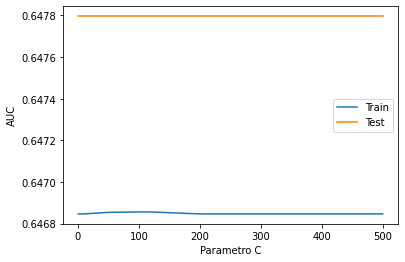

In [197]:
lista_c = []
lista_auc_train = []
lista_auc_test = []

for c in [0.5,10,50,100,120,200,500]:
  modelo_reg_log = LogisticRegression(random_state=1, solver='lbfgs',penalty="l2",C=c)
  modelo_reg_log.fit(X_train, y_train)
  #print("C = ",c)
  lista_c.append(c)
  #print("Score",modelo_reg_log.score(X_test_TFID,y_test))
  try:
    a = roc_auc_score(modelo_reg_log.predict(X_train), y_train)
    lista_auc_train.append(a)
  except ValueError:
    a=0
    lista_auc_train.append(0)
    #print("Train AUC",a)
  try:
    a = roc_auc_score(modelo_reg_log.predict(X_test), y_test)
    lista_auc_test.append(a)
    #print("Test AUC",a)
  except ValueError:
    a=0
    lista_auc_test.append(0)
    #print("Test AUC",a)
# Obtener los resultados al variar el hiper-parametro
resultados = pd.DataFrame({"C":lista_c,"AUC_Train":lista_auc_train,"AUC_Test":lista_auc_test})
print("Tabla de Resultados")
print(resultados,"\n")

import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.plot(resultados["C"], resultados["AUC_Train"],label='Train')
ax.plot(resultados["C"], resultados["AUC_Test"],label='Test')
ax.set_xlabel("Parametro C")
ax.set_ylabel("AUC")
plt.legend()
plt.show()
# Tomaremos el parametro = 100

### Decision Tree Classifier

     C  AUC_Train  AUC_Test
0    5   0.862426  0.861964
1   10   0.903896  0.900928
2   20   0.957544  0.898890
3   40   0.993932  0.881102
4   80   0.999975  0.879060
5  160   0.999975  0.879060
6  320   0.999975  0.879060
7  600   0.999975  0.879060
8  700   0.999975  0.879060


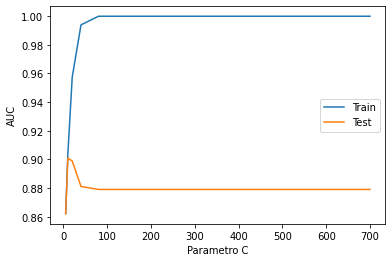

In [198]:
lista_c = []
lista_auc_train = []
lista_auc_test = []

for c in [5,10,20,40,80,160,320,600,700]:
  from sklearn import tree
  modelo_dt = tree.DecisionTreeClassifier(random_state=1,max_depth=c)
  modelo_dt.fit(X_train, y_train)
  # print(modelo_dt.score(X_test,y_test))
  # print(roc_auc_score(modelo_dt.predict(X_test_TFID), y_test))
  lista_c.append(c)
  try:
    a = roc_auc_score(modelo_dt.predict(X_train), y_train)
    lista_auc_train.append(a)
  except ValueError:
    a=0
    lista_auc_train.append(0)
    #print("Train AUC",a)
  try:
    a = roc_auc_score(modelo_dt.predict(X_test), y_test)
    lista_auc_test.append(a)
    #print("Test AUC",a)
  except ValueError:
    a=0
    lista_auc_test.append(0)
    #print("Test AUC",a)
# Obtener los resultados al variar el hiper-parametro
resultados = pd.DataFrame({"C":lista_c,"AUC_Train":lista_auc_train,"AUC_Test":lista_auc_test})
print(resultados)
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.plot(resultados["C"], resultados["AUC_Train"],label='Train')
ax.plot(resultados["C"], resultados["AUC_Test"],label='Test')
ax.set_xlabel("Parametro C")
ax.set_ylabel("AUC")
plt.legend()
plt.show()
#Tomaremos el parametro igual a 10

### Random Forest

     C  AUC_Train  AUC_Test
0    1   0.927587  0.803661
1    2   0.970767  0.886235
2    3   0.977282  0.872091
3    4   0.985272  0.900701
4    5   0.988481  0.893116
5   10   0.994983  0.913385
6   20   0.998355  0.918383
7   30   0.999346  0.920417
8   40   0.999635  0.921751
9   50   0.999762  0.922636
10  60   0.999849  0.922747


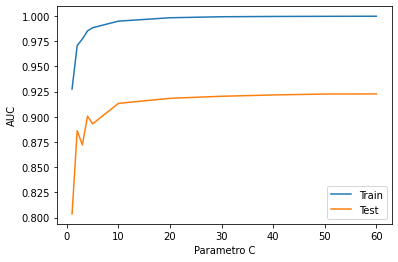

In [195]:
lista_c = []
lista_auc_train = []
lista_auc_test = []

for c in [1,2,3,4,5,10,20,30,40,50,60]:
  from sklearn.ensemble import RandomForestClassifier
  modelo_rf = RandomForestClassifier(n_estimators=c,random_state=2)
  modelo_rf.fit(X_train, y_train)
  # print(modelo_rf.score(X_test_TFID,y_test))
  # print(roc_auc_score(modelo_rf.predict(X_test_TFID), y_test))
  lista_c.append(c)
  try:
    a = roc_auc_score(modelo_rf.predict(X_train), y_train)
    lista_auc_train.append(a)
  except ValueError:
    a=0
    lista_auc_train.append(0)
    #print("Train AUC",a)
  try:
    a = roc_auc_score(modelo_rf.predict(X_test), y_test)
    lista_auc_test.append(a)
    #print("Test AUC",a)
  except ValueError:
    a=0
    lista_auc_test.append(0)
    #print("Test AUC",a)
# Obtener los resultados al variar el hiper-parametro
resultados = pd.DataFrame({"C":lista_c,"AUC_Train":lista_auc_train,"AUC_Test":lista_auc_test})
print(resultados)
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.plot(resultados["C"], resultados["AUC_Train"],label='Train')
ax.plot(resultados["C"], resultados["AUC_Test"],label='Test')
ax.set_xlabel("Parametro C")
ax.set_ylabel("AUC")
plt.legend()
plt.show()
#Tomaremos el parametro = 60

## EVALUACIÓN

En la siguiente tabla podemos observar las metricas de los modelos.

In [199]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score

lista_modelos = ["Regresión Logística","Decision Tree Classifier","Random Forest"]
lista_auc_test = []
lista_accuracy_test = []
lista_f1_test = []
lista_recall_test = []

# MODELO 1: Regresión Logística con parametro 100
modelo_reg_log = LogisticRegression(random_state=1, solver='lbfgs',penalty="l2",C=100)
modelo_reg_log.fit(X_train, y_train)
y_pred = modelo_reg_log.predict(X_test)
lista_auc_test.append(roc_auc_score(y_pred, y_test))
lista_accuracy_test.append(accuracy_score(y_pred, y_test))
lista_f1_test.append(f1_score(y_pred, y_test,pos_label="1"))
lista_recall_test.append(recall_score(y_pred, y_test, average='macro'))

# MODELO 2: Decision Tree Classifier con parametro 10
from sklearn import tree
modelo_dt = tree.DecisionTreeClassifier(random_state=1,max_depth=10)
modelo_dt.fit(X_train, y_train)
y_pred = modelo_dt.predict(X_test)
lista_auc_test.append(roc_auc_score(y_pred, y_test))
lista_accuracy_test.append(accuracy_score(y_pred, y_test))
lista_f1_test.append(f1_score(y_pred, y_test,pos_label="1"))
lista_recall_test.append(recall_score(y_pred, y_test, average='macro'))

# MODELO 3: Random Forest con parametro 60
from sklearn.ensemble import RandomForestClassifier
modelo_rf = RandomForestClassifier(n_estimators=60,random_state=2)
modelo_rf.fit(X_train, y_train)
y_pred = modelo_rf.predict(X_test)
lista_auc_test.append(roc_auc_score(y_pred, y_test))
lista_accuracy_test.append(accuracy_score(y_pred, y_test))
lista_f1_test.append(f1_score(y_pred, y_test,pos_label="1"))
lista_recall_test.append(recall_score(y_pred, y_test, average='macro'))

metricas = pd.DataFrame({"Modelo":lista_modelos,"Metrica AUC":lista_auc_test,"Metrica Accuracy":lista_accuracy_test,"Metrica F1":lista_f1_test,"Metrica Recall":lista_recall_test})
metricas

,Modelo,Metrica AUC,Metrica Accuracy,Metrica F1,Metrica Recall
0,Regresión Logística,0.647796,0.819835,0.201867,0.647796
1,Decision Tree Classifier,0.900928,0.938426,0.819710,0.900928
2,Random Forest,0.922747,0.939353,0.810509,0.922747


De esta tabla podemos ver que el mejor modelo es la Random Forest, con AUC, Accuracy y Recall superiores a los demás modelos. \\
Considero que es un buen modelo lo suficientemente robusto como para acertar en las predicciones. Por otro lado, el modelo Regresión Logística tuvo los peores resultados, de manera inesperada, al igual que otros modelos como Naive Bayes que tuvieron un desempeño no muy bueno.

Posteriormente podemos usar bootstrap para hacer una comparación de las metricas de cada modelo.

In [204]:
lista_auc_test_lr = []
lista_auc_test_nb = []
lista_auc_test_rf = []


for k in range(1,8):
  # Sepación de datos en conjunto de variables independientes (X) y en variable objetivo (y)
  y = pd.DataFrame(data["MIS_Status"])
  y[y=="No_Default"]="0"
  y[y=="Default"]="1"
  X = pd.merge(data_cuantitativas,data_dummies,left_index=True,right_index=True)

  #Tomar la muestra aleatoria con reemplazo de tamaño igual a 70% de len(X)
  X_boot_train = X.sample(n=int(len(X)*0.7), replace=True,random_state=k).copy()
  y_boot_train = y.sample(n=int(len(X)*0.7), replace=True,random_state=k).copy()

  #Tomar el conjuto de prueba a partir de un muestreo sobre los datos que no vivan en el conjunto de entrenamiento
  X_boot_test = X.loc[~X.index.isin(X_boot_train.index)].sample(n=int(len(X)*0.3), replace=True,random_state=k).copy()
  y_boot_test = y.loc[~y.index.isin(y_boot_train.index)].sample(n=int(len(X)*0.3), replace=True,random_state=k).copy()

  #Definimos los conjuntos de Y en train  y test
  y_train = np.array(y_boot_train["MIS_Status"])
  y_test = np.array(y_boot_test["MIS_Status"])

  # MODELO 1: Regresión Logística con parametro 100
  modelo_reg_log = LogisticRegression(random_state=1, solver='lbfgs',penalty="l2",C=100)
  modelo_reg_log.fit(X_boot_train, y_train)
  y_pred = modelo_reg_log.predict(X_boot_test)
  lista_auc_test_lr.append(roc_auc_score(y_pred, y_test))

  # MODELO 2: Decision Tree Classifier con parametro 10
  from sklearn import tree
  modelo_nb = tree.DecisionTreeClassifier(random_state=1,max_depth=10)
  modelo_nb.fit(X_boot_train, y_train)
  y_pred = modelo_nb.predict(X_boot_test)
  lista_auc_test_nb.append(roc_auc_score(y_pred, y_test))

  # MODELO 3: BOSQUE ALEATORIO CON  60 ARBOLES
  from sklearn.ensemble import RandomForestClassifier
  modelo_rf = RandomForestClassifier(n_estimators=60,random_state=2)
  modelo_rf.fit(X_boot_train, y_train)
  y_pred = modelo_rf.predict(X_boot_test)
  lista_auc_test_rf.append(roc_auc_score(y_pred, y_test))


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Text(0.5, 1.0, 'Metrica AUC en 8 ejecuciones de muestreo aleatorio con reemplazo')

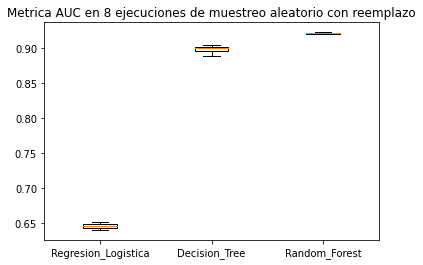

In [211]:
resultados_boot = pd.DataFrame({"Regresion_Logistica":lista_auc_test_lr,"Decision_Tree":lista_auc_test_nb,"Random_Forest":lista_auc_test_rf})
my_dict = {"Regresion_Logistica":lista_auc_test_lr,"Decision_Tree":lista_auc_test_nb,"Random_Forest":lista_auc_test_rf}

fig, ax = plt.subplots()
ax.boxplot(my_dict.values())
ax.set_xticklabels(my_dict.keys())
ax.set_title("Metrica AUC en 8 ejecuciones de muestreo aleatorio con reemplazo")

In [212]:
resultados_boot.describe()

,Regresion_Logistica,Decision_Tree,Random_Forest
count,7.000000,7.000000,7.000000
mean,0.645874,0.897799,0.920683
std,0.003860,0.006100,0.001013
min,0.640237,0.887727,0.919296
25%,0.643537,0.895235,0.920083
50%,0.645826,0.900038,0.920617
75%,0.648198,0.900943,0.921331
max,0.651587,0.904472,0.922043


Después de haber replicado para 8 muestras bootstrap, obtenermos los gráficos de caja y bigotes. \\
El modelo seleccionado es el modelo de Random Forest con 60 árboles, ya que en promedio es el que obtiene mejores resultado en la métrica AUC en el conjunto test. Además de ser el que tiene menor varianza. Con este modelo se alcanza un AUC de en promedio 0.9, lo cual es considerablemente bueno. \\
En contraste, modelos clásicos como Logistic Regression, Naive Bayes, no tuvieron tan buen desempeño. 